# Lab Part 1: MLP with Backpropagation

In [5]:
import numpy as np
from matplotlib import pyplot as plt
from mlp import TwoLayerPerceptron

## Generate Dataset

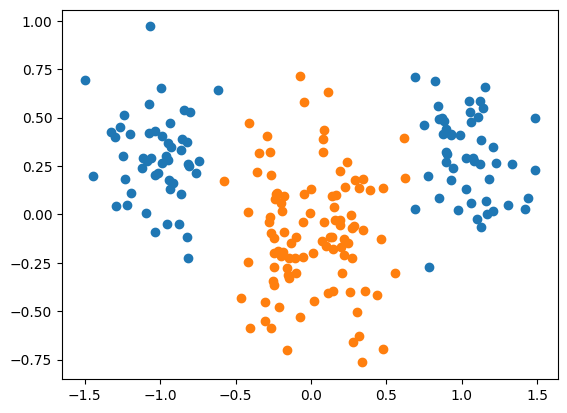

In [30]:
import numpy as np

# Number of data points
ndata = 100

# Mean and standard deviation for class A
mA = np.array([1.0, 0.3])
sigmaA = 0.2

# Mean and standard deviation for class B
mB = np.array([0.0, -0.1])
sigmaB = 0.3

# Class A data
classA = np.zeros((2, ndata))  # Pre-allocate the array for class A
classA[0, :round(0.5 * ndata)] = np.random.randn(round(0.5 * ndata)) * sigmaA - mA[0]
classA[0, round(0.5 * ndata):] = np.random.randn(round(0.5 * ndata)) * sigmaA + mA[0]
classA[1, :] = np.random.randn(ndata) * sigmaA + mA[1]

# Class B data
classB = np.zeros((2, ndata))  # Pre-allocate the array for class B
classB[0, :] = np.random.randn(ndata) * sigmaB + mB[0]
classB[1, :] = np.random.randn(ndata) * sigmaB + mB[1]
plt.scatter(classA[0,:], classA[1,:])
plt.scatter(classB[0,:], classB[1,:])
plt.show()

## Part 1: Observing effect of hidden layer size

(200, 2) (200,)
Last loss:  0.6290210992009226


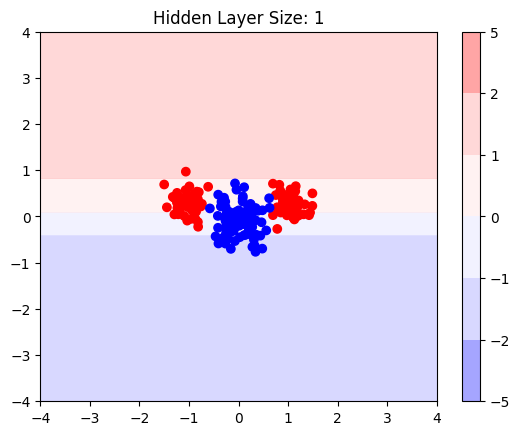

Last loss:  0.07055806711905817


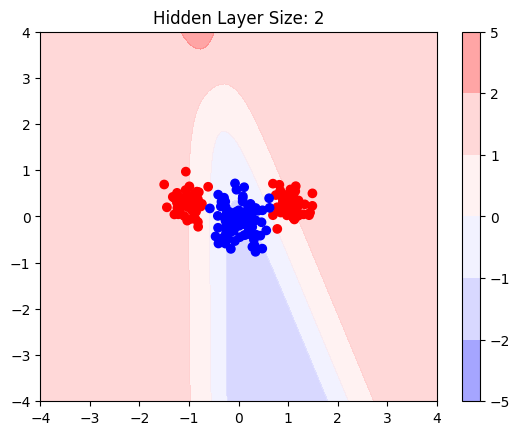

Last loss:  0.07114809701412937


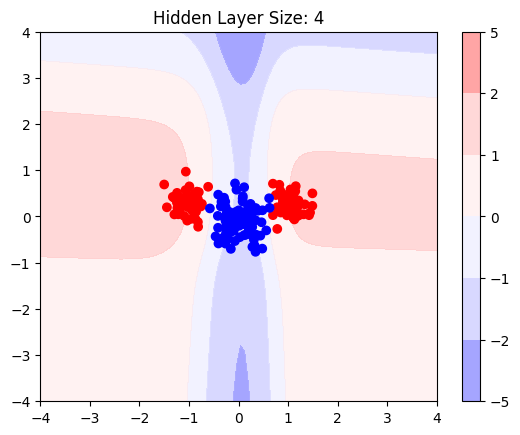

Last loss:  0.0740619870792208


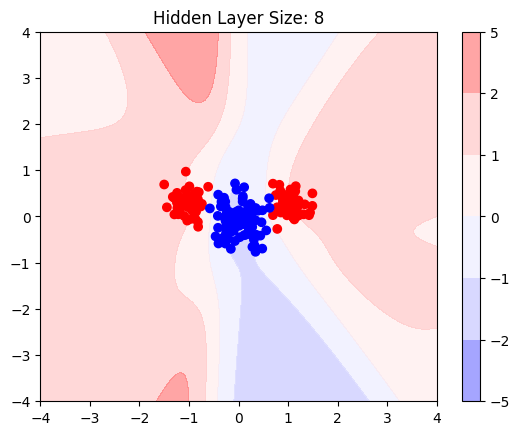

Last loss:  0.05581542678513686


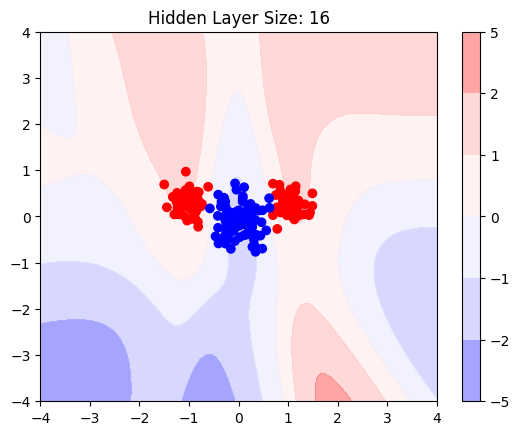

Last loss:  0.06879087638993149


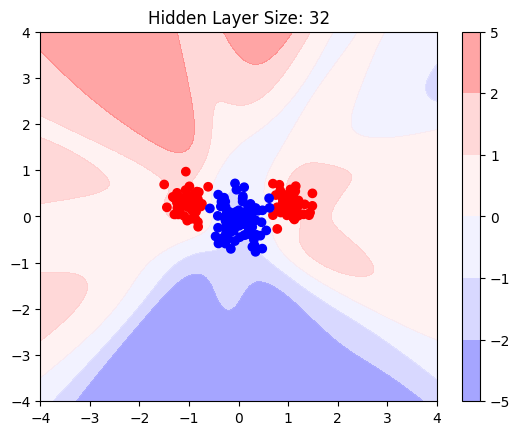

Last loss:  0.06138621504724323


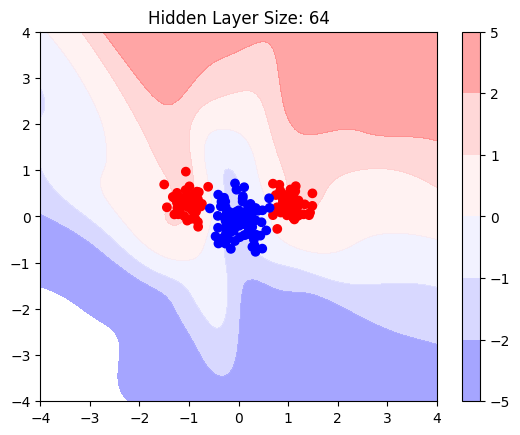

In [32]:
layer_sizes = [1, 2, 4, 8, 16, 32, 64]

losses = []
mlps = []

%matplotlib inline

X = np.concatenate((classA, classB), axis=1).T
Y = np.concatenate((np.ones(ndata), -np.ones(ndata)))

print(X.shape, Y.shape)

for size in layer_sizes:
    mlp = TwoLayerPerceptron(2, size)
    loss = mlp.train(X, Y, lr=0.4e-4, epochs=10000, batch=False)

    plt.title(f"Hidden Layer Size: {size}")
    mlp.visualize(X, Y)

    losses.append(loss)
    mlps.append(mlp)

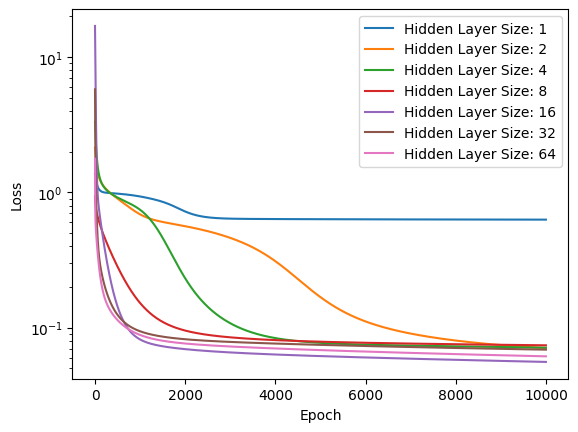

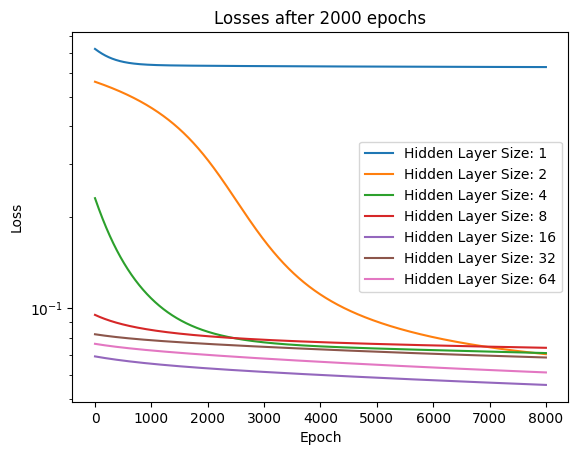

In [36]:
# plot losses across different epochs
plt.figure()
for i, loss in enumerate(losses):
    plt.plot(loss, label=f"Hidden Layer Size: {layer_sizes[i]}")
plt.legend()
plt.xlabel("Epoch")
plt.ylabel("Loss")
# set log scale

plt.yscale("log")
plt.show()

# plot ignoring first 2000 epochs
plt.figure()
plt.title("Losses after 2000 epochs")

for i, loss in enumerate(losses):
    plt.plot(loss[2000:], label=f"Hidden Layer Size: {layer_sizes[i]}")
plt.legend()
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.yscale("log")
plt.show()

In [40]:
accuracies = []
final_losses = []

for i, mlp in enumerate(mlps):
    loss, acc = mlp.test(X, Y)
    accuracies.append(acc)
    final_losses.append(loss)

print("Size\tAccuracy\tLoss")
for i, size in enumerate(layer_sizes):
    print(f"{size}\t{accuracies[i]}\t{final_losses[i]}")

Size	Accuracy	Loss
1	0.255	0.6289499170313093
2	0.01	0.07054419006192042
4	0.015	0.07113066807339485
8	0.015	0.07403346408304448
16	0.015	0.05578111250305336
32	0.015	0.06871191560975216
64	0.015	0.06127168929730535


## Part 2: More realistic dataset with holdout set

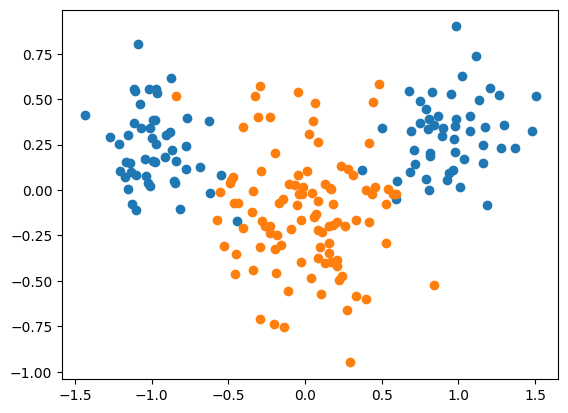

In [43]:
# regenerate dataset
ndata = 100

# Mean and standard deviation for class A
mA = np.array([1.0, 0.3])
sigmaA = 0.2

# Mean and standard deviation for class B
mB = np.array([0.0, -0.1])
sigmaB = 0.3

# Class A data
classA = np.zeros((2, ndata))  # Pre-allocate the array for class A
classA[0, :round(0.5 * ndata)] = np.random.randn(round(0.5 * ndata)) * sigmaA - mA[0]
classA[0, round(0.5 * ndata):] = np.random.randn(round(0.5 * ndata)) * sigmaA + mA[0]
classA[1, :] = np.random.randn(ndata) * sigmaA + mA[1]

# Class B data
classB = np.zeros((2, ndata))  # Pre-allocate the array for class B
classB[0, :] = np.random.randn(ndata) * sigmaB + mB[0]
classB[1, :] = np.random.randn(ndata) * sigmaB + mB[1]
plt.scatter(classA[0,:], classA[1,:])
plt.scatter(classB[0,:], classB[1,:])
plt.show()

In [44]:
# create 3 different holdout sets based on the following scenarios:

In [58]:
import numpy as np

# Shuffle helper function
def shuffle_and_split(data, labels, test_size):
    indices = np.random.permutation(len(data))  # Randomly shuffle the indices
    test_count = int(len(data) * test_size)
    
    # Split the data into train and test sets
    test_indices = indices[:test_count]
    train_indices = indices[test_count:]
    
    X_train = data[train_indices]
    y_train = labels[train_indices]
    X_test = data[test_indices]
    y_test = labels[test_indices]
    
    return X_train, X_test, y_train, y_test

# Combine the data from both classes into X and Y
X = np.concatenate((classA, classB), axis=1).T
Y = np.concatenate((np.ones(ndata), -np.ones(ndata)))

### Scenario 1: Random 25% from each class for the test set
classA_data = classA.T
classB_data = classB.T
classA_labels = np.ones(ndata)
classB_labels = -np.ones(ndata)

# Split classA (25% test)
X_trainA1, X_testA1, y_trainA1, y_testA1 = shuffle_and_split(classA_data, classA_labels, test_size=0.25)
# Split classB (25% test)
X_trainB1, X_testB1, y_trainB1, y_testB1 = shuffle_and_split(classB_data, classB_labels, test_size=0.25)

# Combine train and test sets
X_train1 = np.concatenate((X_trainA1, X_trainB1), axis=0)
y_train1 = np.concatenate((y_trainA1, y_trainB1), axis=0)
X_test1 = np.concatenate((X_testA1, X_testB1), axis=0)
y_test1 = np.concatenate((y_testA1, y_testB1), axis=0)

### Scenario 2: Random 50% from classA for the test set
# Split classA (50% test)
X_trainA2, X_testA2, y_trainA2, y_testA2 = shuffle_and_split(classA_data, classA_labels, test_size=0.50)

# All of classB is in the training set
X_train2 = np.concatenate((X_trainA2, classB_data), axis=0)
y_train2 = np.concatenate((y_trainA2, classB_labels), axis=0)
X_test2 = X_testA2
y_test2 = y_testA2

### Scenario 3: 20% from classA[1,:] < 0 and 80% from classA[1,:] > 0
# Get indices for classA where classA[1, :] < 0 and classA[1, :] > 0
subsetA_neg = classA_data[classA[0, :] < 0]
subsetA_pos = classA_data[classA[0, :] > 0]
labels_neg = np.ones(len(subsetA_neg))
labels_pos = np.ones(len(subsetA_pos))

# 20% from subsetA_neg
X_train_neg, X_test_neg, y_train_neg, y_test_neg = shuffle_and_split(subsetA_neg, labels_neg, test_size=0.20)

# 80% from subsetA_pos
X_train_pos, X_test_pos, y_train_pos, y_test_pos = shuffle_and_split(subsetA_pos, labels_pos, test_size=0.80)

# Combine train and test sets for classA
X_test3 = np.concatenate((X_test_neg, X_test_pos), axis=0)
y_test3 = np.concatenate((y_test_neg, y_test_pos), axis=0)
X_train3 = np.concatenate((X_train_neg, X_train_pos, classB_data), axis=0)
y_train3 = np.concatenate((y_train_neg, y_train_pos, classB_labels), axis=0)

# Outputs: X_train1, y_train1, X_test1, y_test1 (for scenario 1)
#          X_train2, y_train2, X_test2, y_test2 (for scenario 2)
#          X_train3, y_train3, X_test3, y_test3 (for scenario 3)

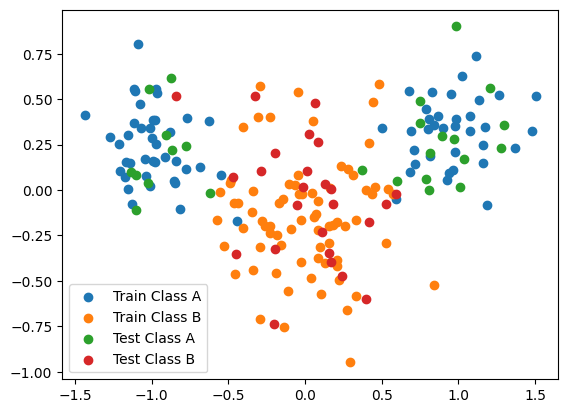

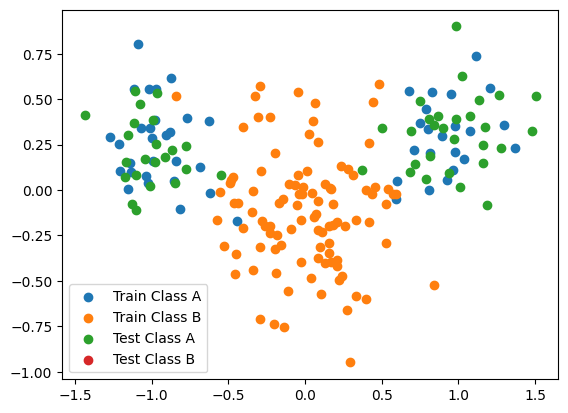

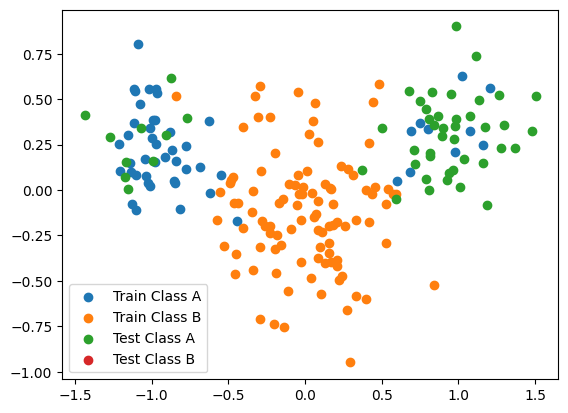

In [59]:
def plot_test_train(X_train, y_train, X_test, y_test):
    plt.scatter(X_train[y_train == 1, 0], X_train[y_train == 1, 1], label="Train Class A")
    plt.scatter(X_train[y_train == -1, 0], X_train[y_train == -1, 1], label="Train Class B")
    plt.scatter(X_test[y_test == 1, 0], X_test[y_test == 1, 1], label="Test Class A")
    plt.scatter(X_test[y_test == -1, 0], X_test[y_test == -1, 1], label="Test Class B")
    plt.legend()
    plt.show()


plot_test_train(X_train1, y_train1, X_test1, y_test1)
plot_test_train(X_train2, y_train2, X_test2, y_test2)
plot_test_train(X_train3, y_train3, X_test3, y_test3)